> **Problem overview**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

In [1]:
# import python standard library
import time

# import data manipulation library
import numpy as np
import pandas as pd

# import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import tensorflow model class
import tensorflow as tf

# import sklearn model selection
from sklearn.model_selection import train_test_split

> **Acquiring training and testing data**

We start by acquiring the training and testing datasets into Pandas DataFrames.

In [2]:
# acquiring training and testing data
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
# visualize head of the training data
df_train.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# visualize tail of the testing data
df_test.tail(n=5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# combine training and testing dataframe
df_train['datatype'], df_test['datatype'] = 'training', 'testing'
df_train['imageid'] = df_train.index + 1
df_test.insert(0, 'label', np.nan)
df_test['imageid'] = df_test.index + 1
df_data = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
# data dimensions
img_size = 28
num_channels = 1
num_classes = 10

# flat dimensions
img_size_flat = img_size * img_size * num_channels

> **Feature exploration, engineering and cleansingFeature exploration, engineering and cleansing**

Here we generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution together with exploring some data.


In [7]:
# imageplot function plot
def imageplot(pixel = None, label = None, ncols = 5, nrows = 3):
    fig, axes = plt.subplots(figsize=(4*ncols , 3*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()
    for i in range(len(label)): axes[i].imshow(pixel[i].reshape(img_size, img_size), interpolation='spline16')

In [8]:
# describe training and testing data
df_data.describe(include='all')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,datatype,imageid
count,42000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000,70000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42000,NaN
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001800,0.006714,0.003086,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000229,0.001329,0.011329,0.023071,0.043229,0.062243,0.117929,...,1.659614,0.992457,0.541814,0.245643,0.080957,0.021000,0.000829,0.000843,0.0,0.0,0.0,0.0,0.0,0.0,0.002171,0.013357,0.036000,0.082671,0.122586,0.187657,0.310871,0.394871,0.495457,0.571071,0.669500,0.589571,0.479229,0.333600,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,NaN,18200.500000
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440064,1.260218,0.816403,0.034017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060474,0.230432,1.322745,2.029539,2.951033,3.242019,4.820413,...,17.840756,13.744477,10.299782,6.699808,3.631055,1.638692,0.136380,0.222999,0.0,0.0,0.0,0.0,0.0,0.0,0.405072,1.593527,2.409111,3.872385,4.709048,6.022443,7.421689,8.660856,9.605280,10.274678,11.236708,10.501991,9.448936,7.921717,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,NaN,11229.208993
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

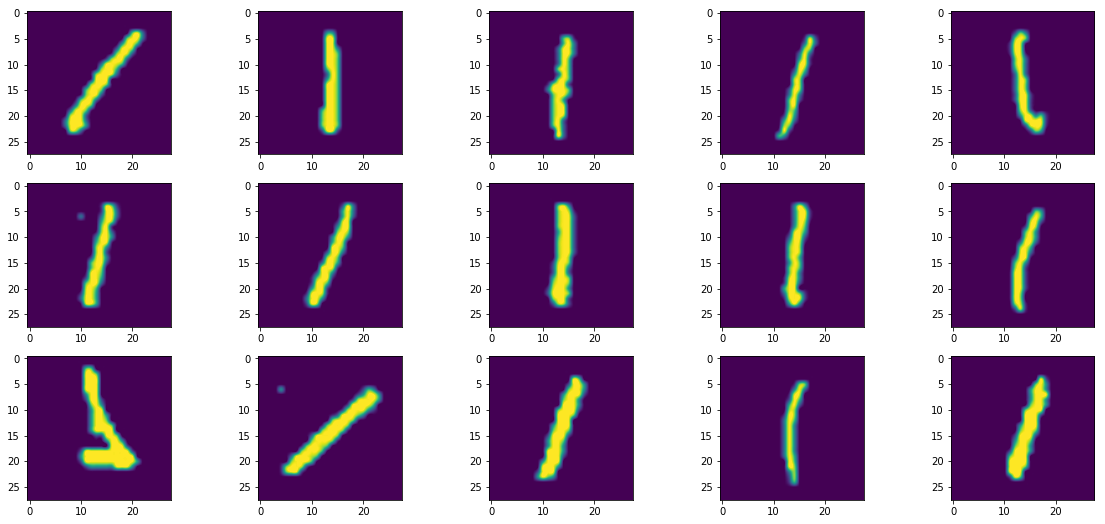

In [9]:
# feature exploration: number 1
number = 1
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

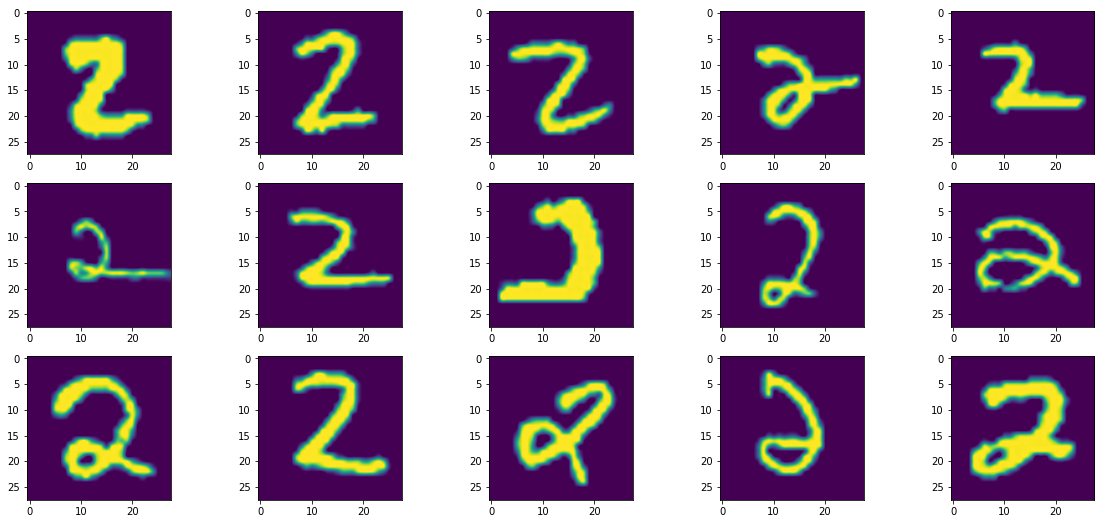

In [10]:
# feature exploration: number 2
number = 2
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

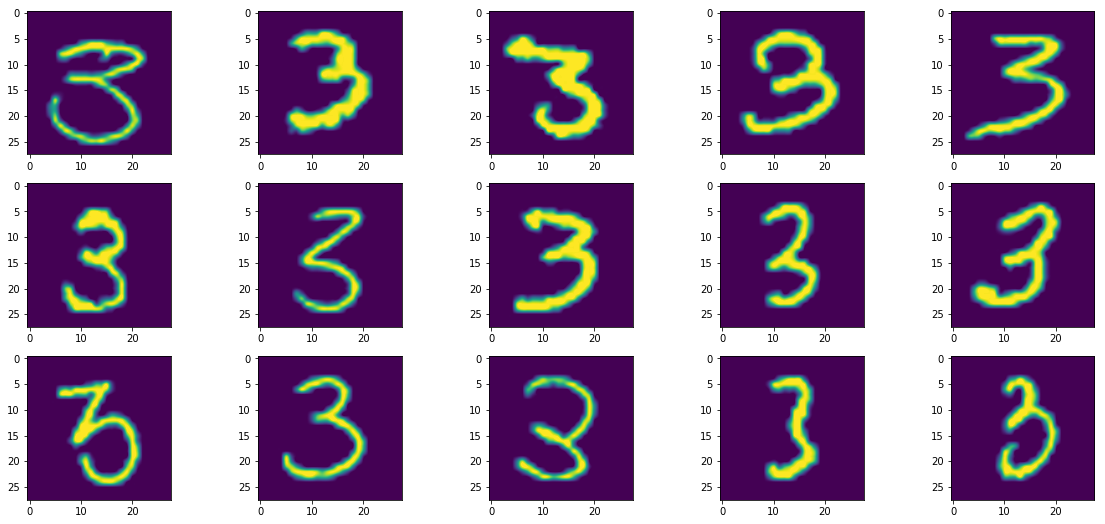

In [11]:
# feature exploration: number 3
number = 3
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

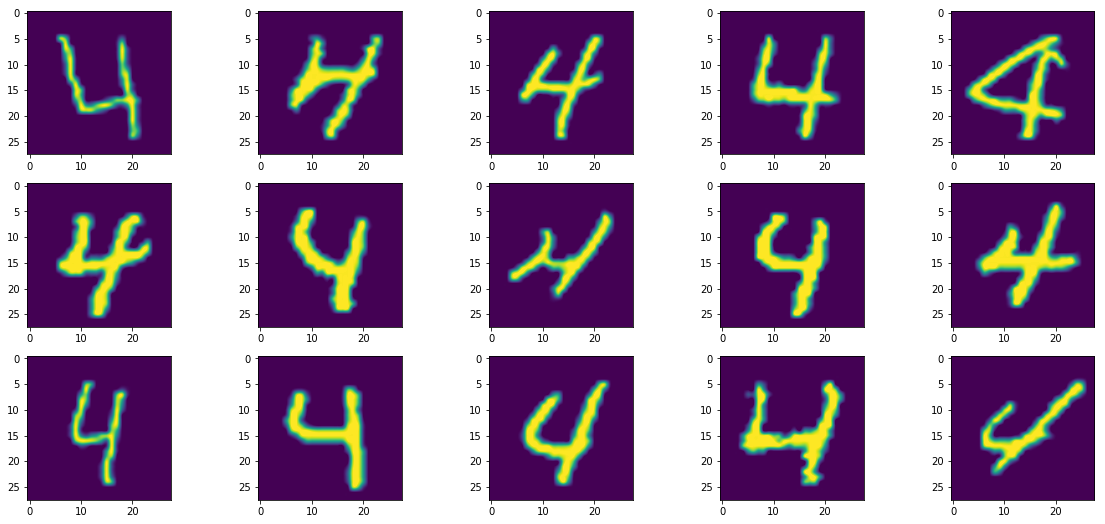

In [12]:
# feature exploration: number 4
number = 4
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

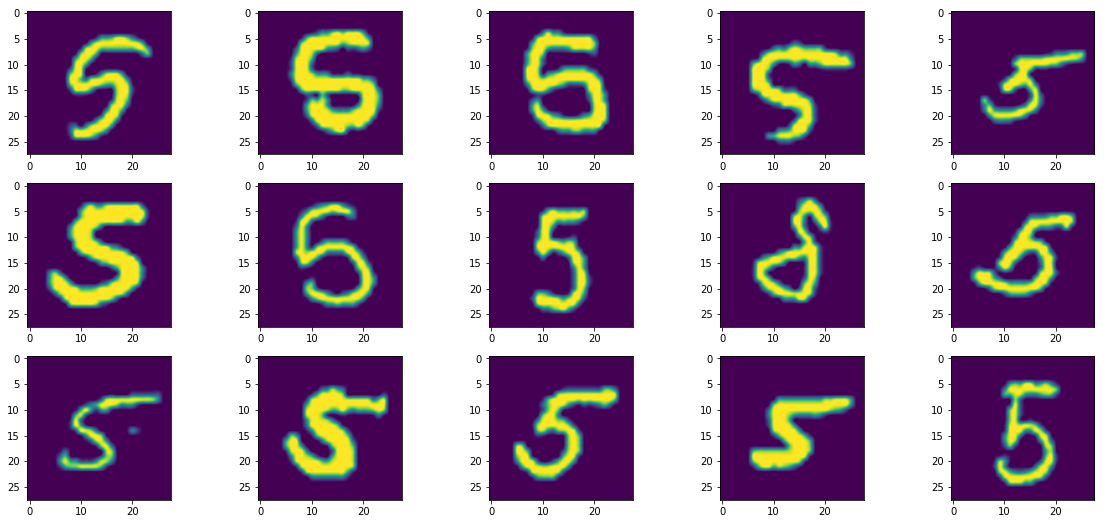

In [13]:
# feature exploration: number 5
number = 5
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

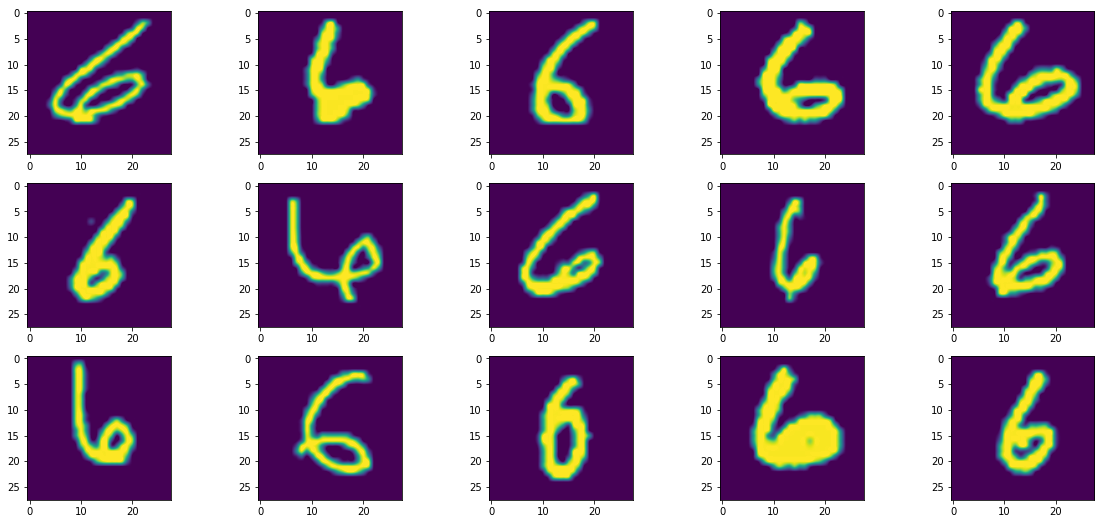

In [14]:
# feature exploration: number 6
number = 6
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

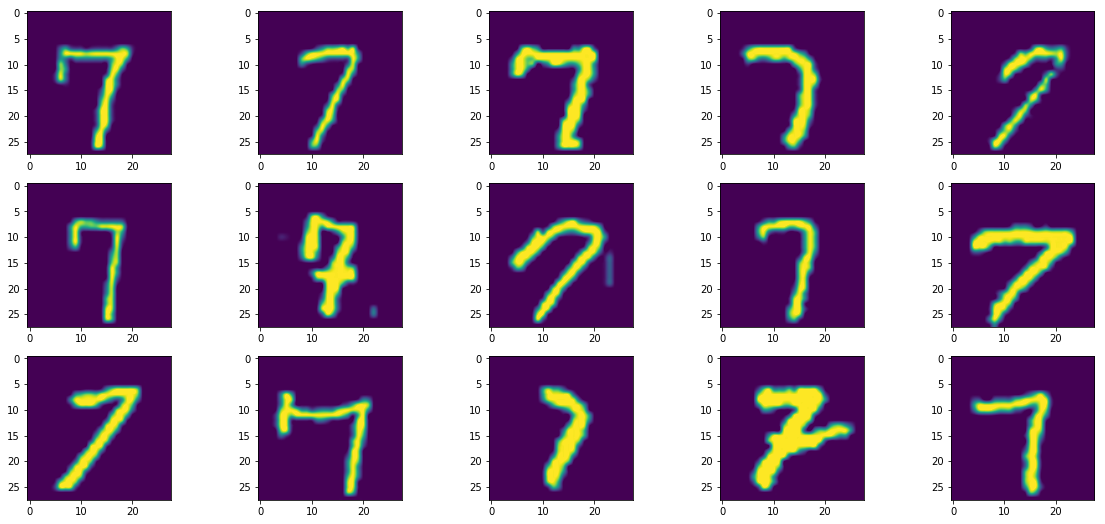

In [15]:
# feature exploration: number 7
number = 7
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

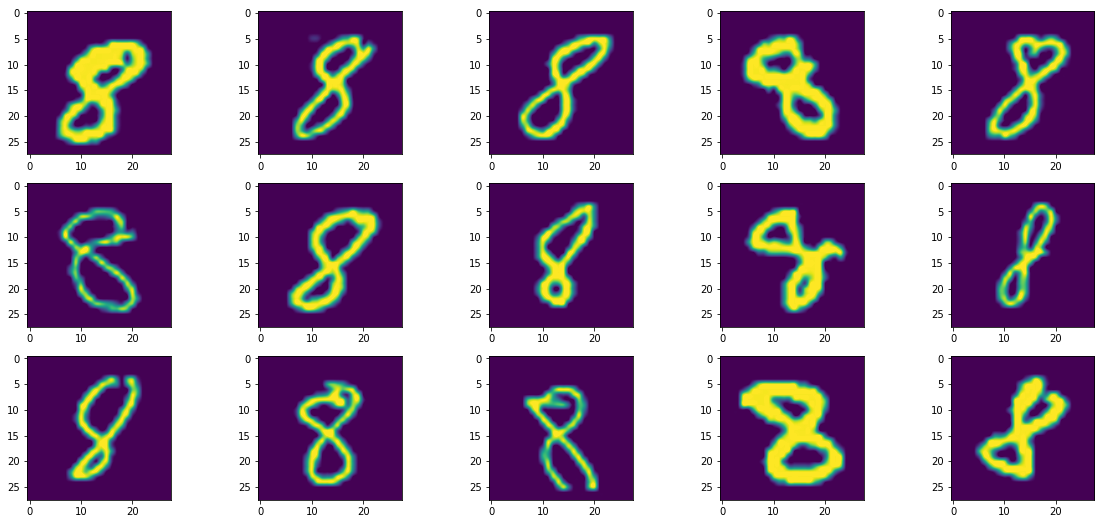

In [16]:
# feature exploration: number 8
number = 8
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

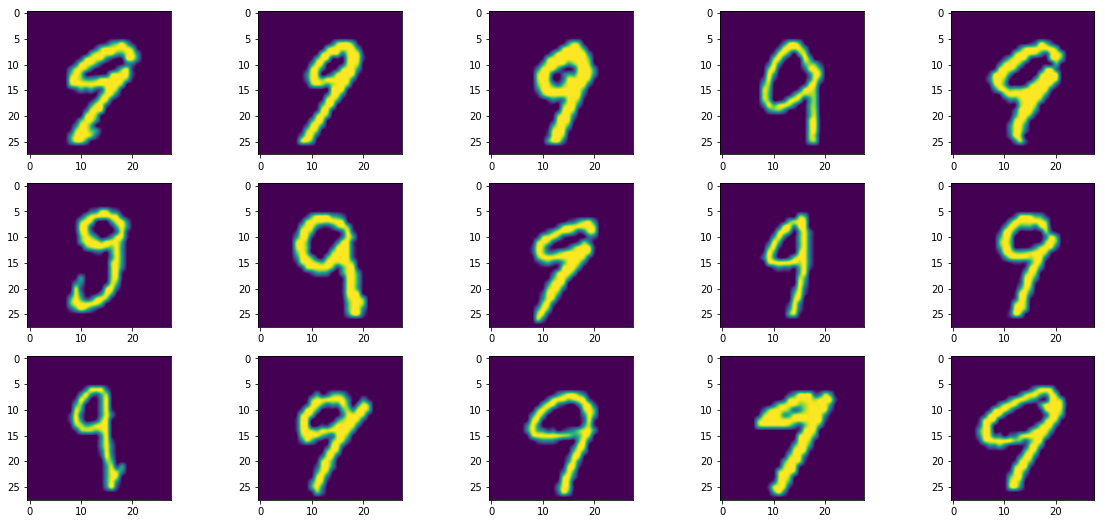

In [17]:
# feature exploration: number 9
number = 9
pixel = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), df_data.columns[1:-2]].values
label = df_data.loc[(df_data['datatype'] == 'training') & (df_data['label'] == number), 'label'].values
imageplot(pixel=pixel[:15], label=label[:15], nrows=3)

In [18]:
# feature extraction: normalize pixel between 0 to 1
col_pixels = df_data.columns[1:-2]
df_data[col_pixels] = df_data[col_pixels] / 255.0

After extracting all features, it is required to convert category features to numerics features, a format suitable to feed into our Machine Learning models.

In [19]:
# feature extraction: label
df_data['label'] = df_data['label'].fillna(-1).astype(int)

In [20]:
# convert category codes for data dataframe
df_data = pd.get_dummies(df_data, columns=['datatype', 'label'], drop_first=True)

In [21]:
# describe data dataframe
df_data.describe(include='all')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,imageid,datatype_training,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,7.000000e+04,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.000026,0.000012,5.042017e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.963585e-07,0.000005,0.000044,0.000090,0.000170,0.000244,0.000462,0.000672,...,0.0,0.0,0.0,0.0,0.000009,0.000052,0.000141,0.000324,0.000481,0.000736,0.001219,0.001549,0.001943,0.002239,0.002625,0.002312,0.001879,0.001308,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0,18200.500000,0.600000,0.059029,0.066914,0.059671,0.062157,0.058171,0.054214,0.059100,0.062871,0.058043,0.059829
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001726,0.004942,0.003202,1.333992e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.371542e-04,0.000904,0.005187,0.007959,0.011573,0.012714,0.018904,0.022263,...,0.0,0.0,0.0,0.0,0.001589,0.006249,0.009447,0.015186,0.018467,0.023617,0.029105,0.033964,0.037668,0.040293,0.044066,0.041184,0.037055,0.031066,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0,11229.208993,0.489901,0.235680,0.249875,0.236879,0.241442,0.234069,0.226442,0.235813,0.242733,0.233826,0.237171
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8750.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [22]:
# verify dtypes object
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 796 entries, pixel0 to label_9
dtypes: float64(784), int64(1), uint8(11)
memory usage: 420.0 MB


> **Model, predict and solve the problem**

Now, it is time to feed the features to Machine Learning models.

In [23]:
# select all features
x = df_data[df_data['datatype_training'] == 1].drop(['imageid', 'datatype_training', 'label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9'], axis=1)
y = df_data.loc[df_data['datatype_training'] == 1, ['label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9']]

In [24]:
# perform train-test (validate) split
x_train, x_validate, y_train, y_validate = train_test_split(x, y, random_state=58, test_size=0.25)

A TensorFlow graph consists of the following parts which will be detailed below:
* Placeholder variables used for inputting data to the graph.
* Variables that are going to be optimized so as to make the convolutional network perform better.
* The mathematical formulas for the convolutional network.
* A loss measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables.

In [25]:
# weight variable
def weight_variable(shape, name = None, stddev = 0.1):
    return tf.Variable(tf.truncated_normal(shape, stddev=stddev, seed=58), name=name)

In [26]:
# bias variable
def bias_variable(shape, name = None, value = 0.1):
    return tf.Variable(tf.constant(value, shape=shape), name=name)

In [27]:
# conv2d layer
def conv2d_layer(x, weight, bias, padding = 'SAME', strides = [1, 1, 1, 1]):
    return tf.nn.conv2d(x, weight, strides, padding) + bias

In [28]:
# fully connected layer
def fc_layer(x, weight, bias):
    return tf.matmul(x, weight) + bias

In [29]:
# flatten layer
def flatten_layer(x):
    num_features = x.get_shape()[1:4].num_elements()
    return tf.reshape(x, [-1, num_features]), num_features

In [30]:
# max pool layer
def max_pool_layer(x, ksize = [1, 2, 2, 1], padding = 'SAME', strides = [1, 2, 2, 1]):
    return tf.nn.max_pool(x, ksize, strides, padding)

In [31]:
# relu layer
def relu_layer(x):
    return tf.nn.relu(x)

In [32]:
# reset default graph
tf.reset_default_graph()

In [33]:
# placeholder variables used for inputting data to the graph
x_flat = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_flat')
x_image = tf.reshape(x_flat, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_class = tf.argmax(y_true, axis=1)

In [34]:
# convolution + relu + max pool layer 1
weight_conv1 = weight_variable([5, 5, num_channels, 16], name='weight_conv1')
bias_conv1 = bias_variable([16], name='bias_conv1')
layer_conv1 = max_pool_layer(relu_layer(conv2d_layer(x_image, weight_conv1, bias_conv1)))

In [35]:
# convolution + relu + max pool layer 2
weight_conv2 = weight_variable([5, 5, 16, 64], name='weight_conv2')
bias_conv2 = bias_variable([64], name='bias_conv2')
layer_conv2 = max_pool_layer(relu_layer(conv2d_layer(layer_conv1, weight_conv2, bias_conv2)))

In [36]:
# flatten layer
layer_flat, num_features = flatten_layer(layer_conv2)

In [37]:
# fully connected + relu layer 1
weight_fc1 = weight_variable([num_features, 128], name='weight_fc1')
bias_fc1 = bias_variable([128], name='bias_fc1')
layer_fc1 = relu_layer(fc_layer(layer_flat, weight_fc1, bias_fc1))

In [38]:
# fully connected + relu layer 2
weight_fc2 = weight_variable([128, num_classes], name='weight_fc2')
bias_fc2 = bias_variable([num_classes], name='bias_fc2')
layer_fc2 = relu_layer(fc_layer(layer_fc1, weight_fc2, bias_fc2))

In [39]:
# predicted class label
y_pred_proba = tf.nn.softmax(layer_fc2)
y_pred_class = tf.argmax(y_pred_proba, axis=1)

In [40]:
# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=layer_fc2))

In [41]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [42]:
# performance metrics
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred_class, y_true_class), tf.float32))

In [43]:
# counter for total number of iterations performed so far
total_epoch = 0
rndobj = np.random.RandomState(seed=58)

def optimize(num_epoch, printcost = True, printfrequency = 1000, train_batch_size = 128, validate_batch_size = 128):
    global total_epoch
    
    # record start time
    timestart = time.time()
    
    for i in range(total_epoch, total_epoch + num_epoch):
        # specify batch size
        train_index = rndobj.choice(x_train.index, replace=True, size=train_batch_size)
        validate_index = rndobj.choice(x_validate.index, replace=True, size=validate_batch_size)
        
        # tensorflow model fit
        feed_dict_train = {x_flat: x_train.loc[train_index], y_true: y_train.loc[train_index]}
        feed_dict_validate = {x_flat: x_validate.loc[validate_index], y_true: y_validate.loc[validate_index]}
        session.run(optimizer, feed_dict=feed_dict_train)
        
        # print status every 1000 iterations
        if printcost and i % printfrequency == 0: print('epoch: %d, training accuracy: %f, testing accuracy: %f' %(i + 1, session.run(accuracy, feed_dict=feed_dict_train), session.run(accuracy, feed_dict=feed_dict_validate)))
    
    # update the total epoch
    total_epoch += num_epoch
    
    # record end time
    timeend = time.time()
    
    # time elapsed
    timeelapsed = timeend - timestart
    
    # print the time elapsed
    print("elapsed time: %f" %timeelapsed)

In [44]:
# create tensorflow session
session = tf.Session()
session.run(tf.global_variables_initializer())

In [45]:
# tensorflow model fit 1 epoch
optimize(1)

epoch: 1, training accuracy: 0.125000, testing accuracy: 0.117188
elapsed time: 0.416102


In [46]:
# tensorflow model fit 10000 epoch
optimize(10000)

epoch: 1001, training accuracy: 0.976562, testing accuracy: 0.968750
epoch: 2001, training accuracy: 0.992188, testing accuracy: 0.976562
epoch: 3001, training accuracy: 0.984375, testing accuracy: 0.976562
epoch: 4001, training accuracy: 0.984375, testing accuracy: 0.968750
epoch: 5001, training accuracy: 0.992188, testing accuracy: 0.968750
epoch: 6001, training accuracy: 1.000000, testing accuracy: 0.960938
epoch: 7001, training accuracy: 1.000000, testing accuracy: 0.968750
epoch: 8001, training accuracy: 1.000000, testing accuracy: 0.992188
epoch: 9001, training accuracy: 1.000000, testing accuracy: 0.984375
epoch: 10001, training accuracy: 1.000000, testing accuracy: 0.992188
elapsed time: 1230.811876


> **Supply or submit the results**

Our submission to the competition site Kaggle is ready. Any suggestions to improve our score are welcome.

In [47]:
# prepare testing data and compute the observed value
x_test = df_data[df_data['datatype_training'] == 0].drop(['imageid', 'datatype_training', 'label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9'], axis=1)
y_test = pd.DataFrame(y_pred_class.eval(session=session, feed_dict={x_flat: x_test}),
                      columns=['Label'], index=df_data.loc[df_data['datatype_training'] == 0, 'imageid'])

In [48]:
# summit the results
out = pd.DataFrame({'ImageId': y_test.index, 'Label': y_test['Label']})
out.to_csv('submission.csv', index=False)